# Business Case: Porter: Neural Networks Regression
 
# Defining Problem Statement & Data Import

### Problem Statement: 
Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features.

### Dataset:
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/039/original/dataset.csv.zip?1663710760

### Data Dictionary:
Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

* market_id : integer id for the market where the restaurant lies
* created_at : the timestamp at which the order was placed
* actual_delivery_time : the timestamp when the order was delivered
* store_primary_category : category for the restaurant
* order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
* total_items subtotal : final price of the order
* num_distinct_items : the number of distinct items in the order
* min_item_price : price of the cheapest item in the order
* max_item_price : price of the costliest item in order
* total_onshift_partners : number of delivery partners on duty at the time order was placed
* total_busy_partners : number of delivery partners attending to other tasks
* total_outstanding_orders : total number of orders to be fulfilled at the moment
   
# Analysing basic metrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Loading of dataset
df = pd.read_csv("../Hemangi/dataset.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [3]:
df.shape #to observe shape of data

(197428, 14)

* Dataset is of 205843 rows and 7 attributes.

In [4]:
df.info() #to observe the data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

## Check for Duplicate Values

In [5]:
df.duplicated().sum()

0

* There are no duplicate instances in the data


In [6]:
df.dropna(inplace=True)
df.shape

(176248, 14)

## Check for Missing Values

In [7]:
# Check Missing Values
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

## Preprocessing & Feature Creation

In [8]:
#Setting datetime format for respective columns
df['created_at']= pd.to_datetime(df['created_at'], dayfirst=True)
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'], dayfirst=True)

In [9]:
#Creating new features from Date Time
df['order_hour']=df['created_at'].dt.hour
df['order_day']=df['created_at'].dt.dayofweek

In [10]:
#Creating Target Variable & converting it to number of minutes
df['time_taken']=df['actual_delivery_time']-df['created_at']
df['delivery_time_taken']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [11]:
#Dropping the columns that are no longer required
df.drop(['time_taken','created_at','actual_delivery_time','store_id'],axis=1,inplace=True)

In [12]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

In [13]:
#Converting required float columns to int datatype
float_cols = ['total_onshift_partners','total_busy_partners','total_outstanding_orders','order_protocol','market_id','delivery_time_taken']
df[float_cols] = df[float_cols].astype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   market_id                 176248 non-null  int64
 1   store_primary_category    176248 non-null  int8 
 2   order_protocol            176248 non-null  int64
 3   total_items               176248 non-null  int64
 4   subtotal                  176248 non-null  int64
 5   num_distinct_items        176248 non-null  int64
 6   min_item_price            176248 non-null  int64
 7   max_item_price            176248 non-null  int64
 8   total_onshift_partners    176248 non-null  int64
 9   total_busy_partners       176248 non-null  int64
 10  total_outstanding_orders  176248 non-null  int64
 11  order_hour                176248 non-null  int64
 12  order_day                 176248 non-null  int64
 13  delivery_time_taken       176248 non-null  int64
dtypes: int64(13), int8(1

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,176248.0,2.743747,1.330911,1.0,2.0,2.0,4.0,6.0
store_primary_category,176248.0,35.891482,20.728572,0.0,18.0,38.0,55.0,72.0
order_protocol,176248.0,2.911687,1.512920,1.0,1.0,3.0,4.0,7.0
total_items,176248.0,3.204592,2.673899,1.0,2.0,3.0,4.0,411.0
subtotal,176248.0,2696.498939,1828.922584,0.0,1408.0,2221.0,3407.0,26800.0
num_distinct_items,176248.0,2.674589,1.625558,1.0,1.0,2.0,3.0,20.0
min_item_price,176248.0,684.937730,519.911425,-86.0,299.0,595.0,942.0,14700.0
max_item_price,176248.0,1159.886994,560.784510,0.0,799.0,1095.0,1395.0,14700.0
total_onshift_partners,176248.0,44.905276,34.529394,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,176248.0,41.845434,32.154573,-5.0,15.0,35.0,62.0,154.0


In [16]:
df.describe(include = np.number, percentiles=[.25,.5,.75,.90,.95, .99, .999]).round(2).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.9%,max
market_id,176248.0,2.74,1.33,1.0,2.0,2.0,4.0,5.0,5.0,5.00,6.0,6.0
store_primary_category,176248.0,35.89,20.73,0.0,18.0,38.0,55.0,61.0,68.0,72.00,72.0,72.0
order_protocol,176248.0,2.91,1.51,1.0,1.0,3.0,4.0,5.0,5.0,5.00,6.0,7.0
total_items,176248.0,3.20,2.67,1.0,2.0,3.0,4.0,6.0,7.0,12.00,25.0,411.0
subtotal,176248.0,2696.50,1828.92,0.0,1408.0,2221.0,3407.0,4970.0,6250.0,9467.65,13188.0,26800.0
num_distinct_items,176248.0,2.67,1.63,1.0,1.0,2.0,3.0,5.0,6.0,8.00,12.0,20.0
min_item_price,176248.0,684.94,519.91,-86.0,299.0,595.0,942.0,1295.0,1579.0,2500.00,4248.0,14700.0
max_item_price,176248.0,1159.89,560.78,0.0,799.0,1095.0,1395.0,1795.0,2100.0,3100.00,4965.0,14700.0
total_onshift_partners,176248.0,44.91,34.53,-4.0,17.0,37.0,65.0,98.0,115.0,136.00,153.0,171.0
total_busy_partners,176248.0,41.85,32.15,-5.0,15.0,35.0,62.0,90.0,105.0,126.00,142.0,154.0


## Outlier Detection

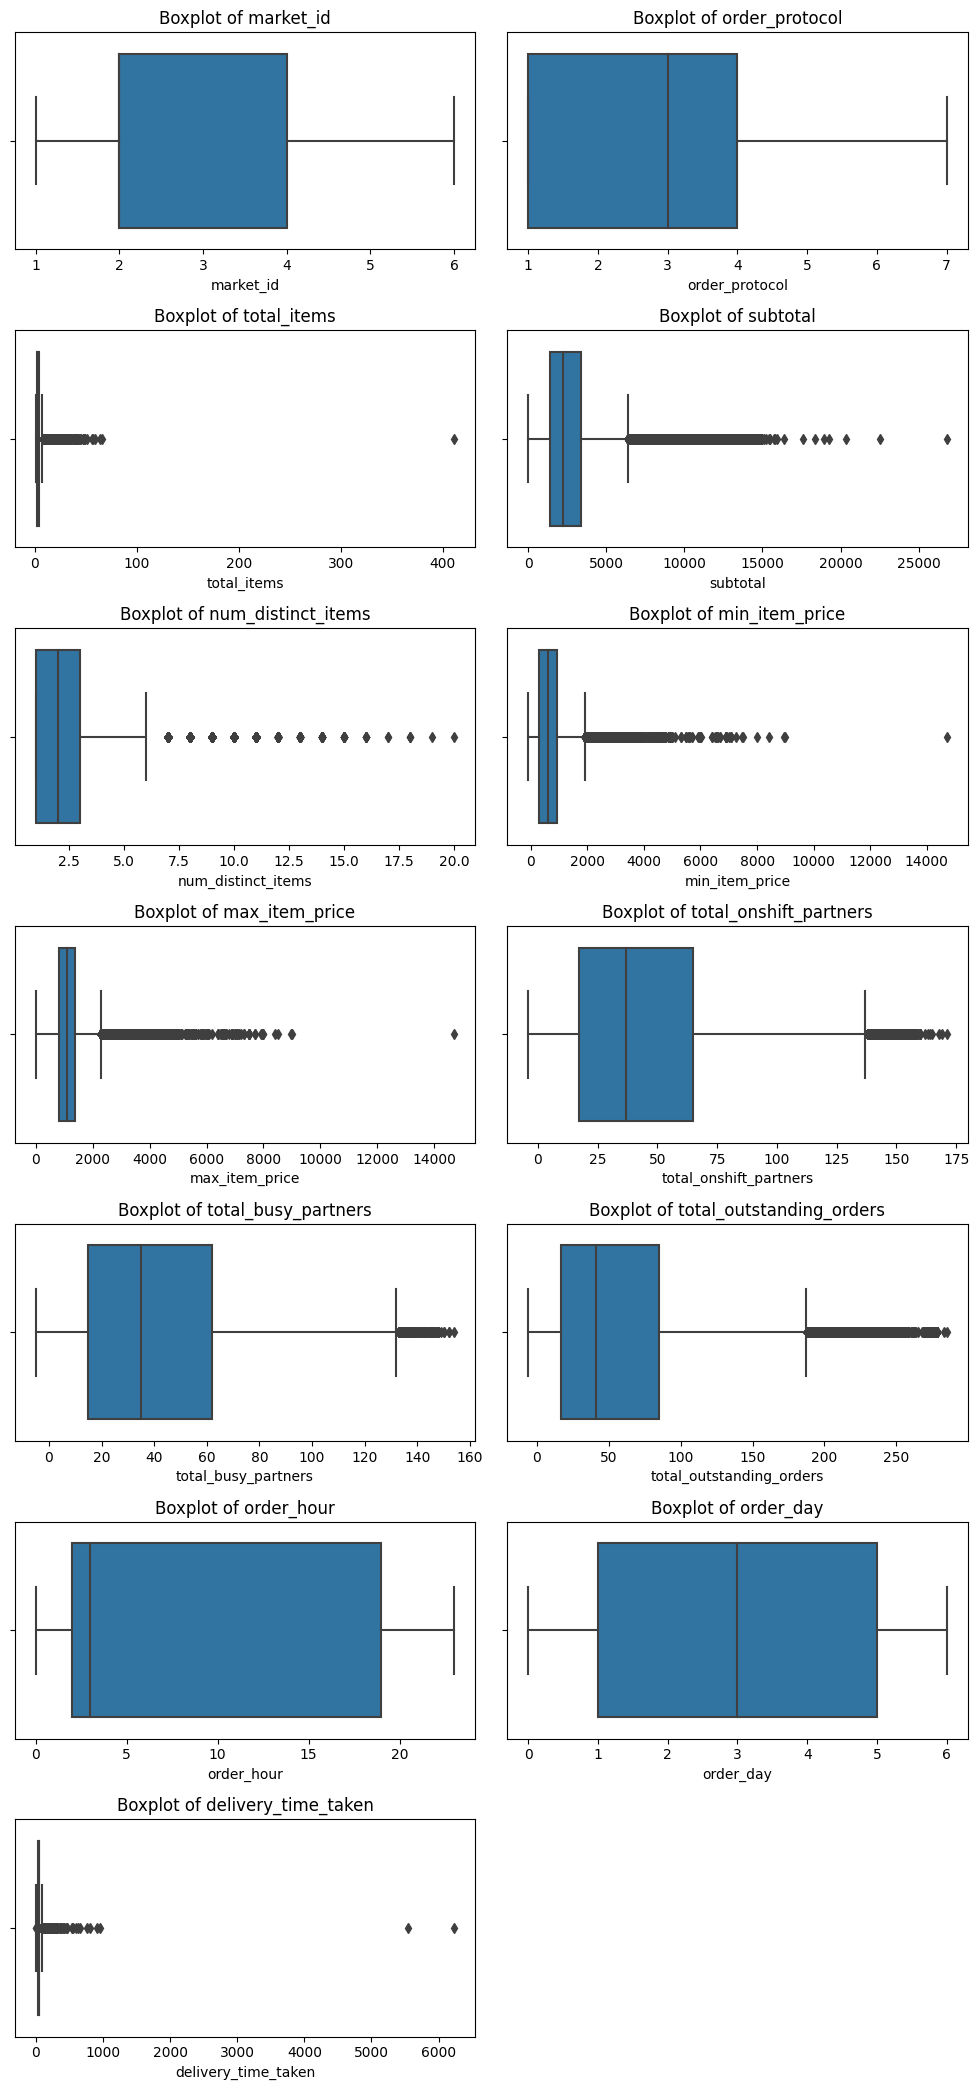

In [17]:
#Distribution of numerical variables
num_vars = df.select_dtypes('int').columns.tolist()
fig = plt.figure(figsize=(10,21))
i=1
for col in num_vars:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

* Here we can see that many columns have outliers. Lets remove the outliers using IQR method.

In [18]:
# Remove outliers through IQR method
num_vars = df.select_dtypes('int').columns.tolist()

for col in num_vars:
  # Calculate Q1 and Q3
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)

  # Calculate IQR
  iqr = q3 - q1

  # Define lower and upper bounds
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # Remove outliers
  df = df.loc[~((df[col] < lower_bound) | (df[col] > upper_bound))]
    
df.shape

(142029, 14)

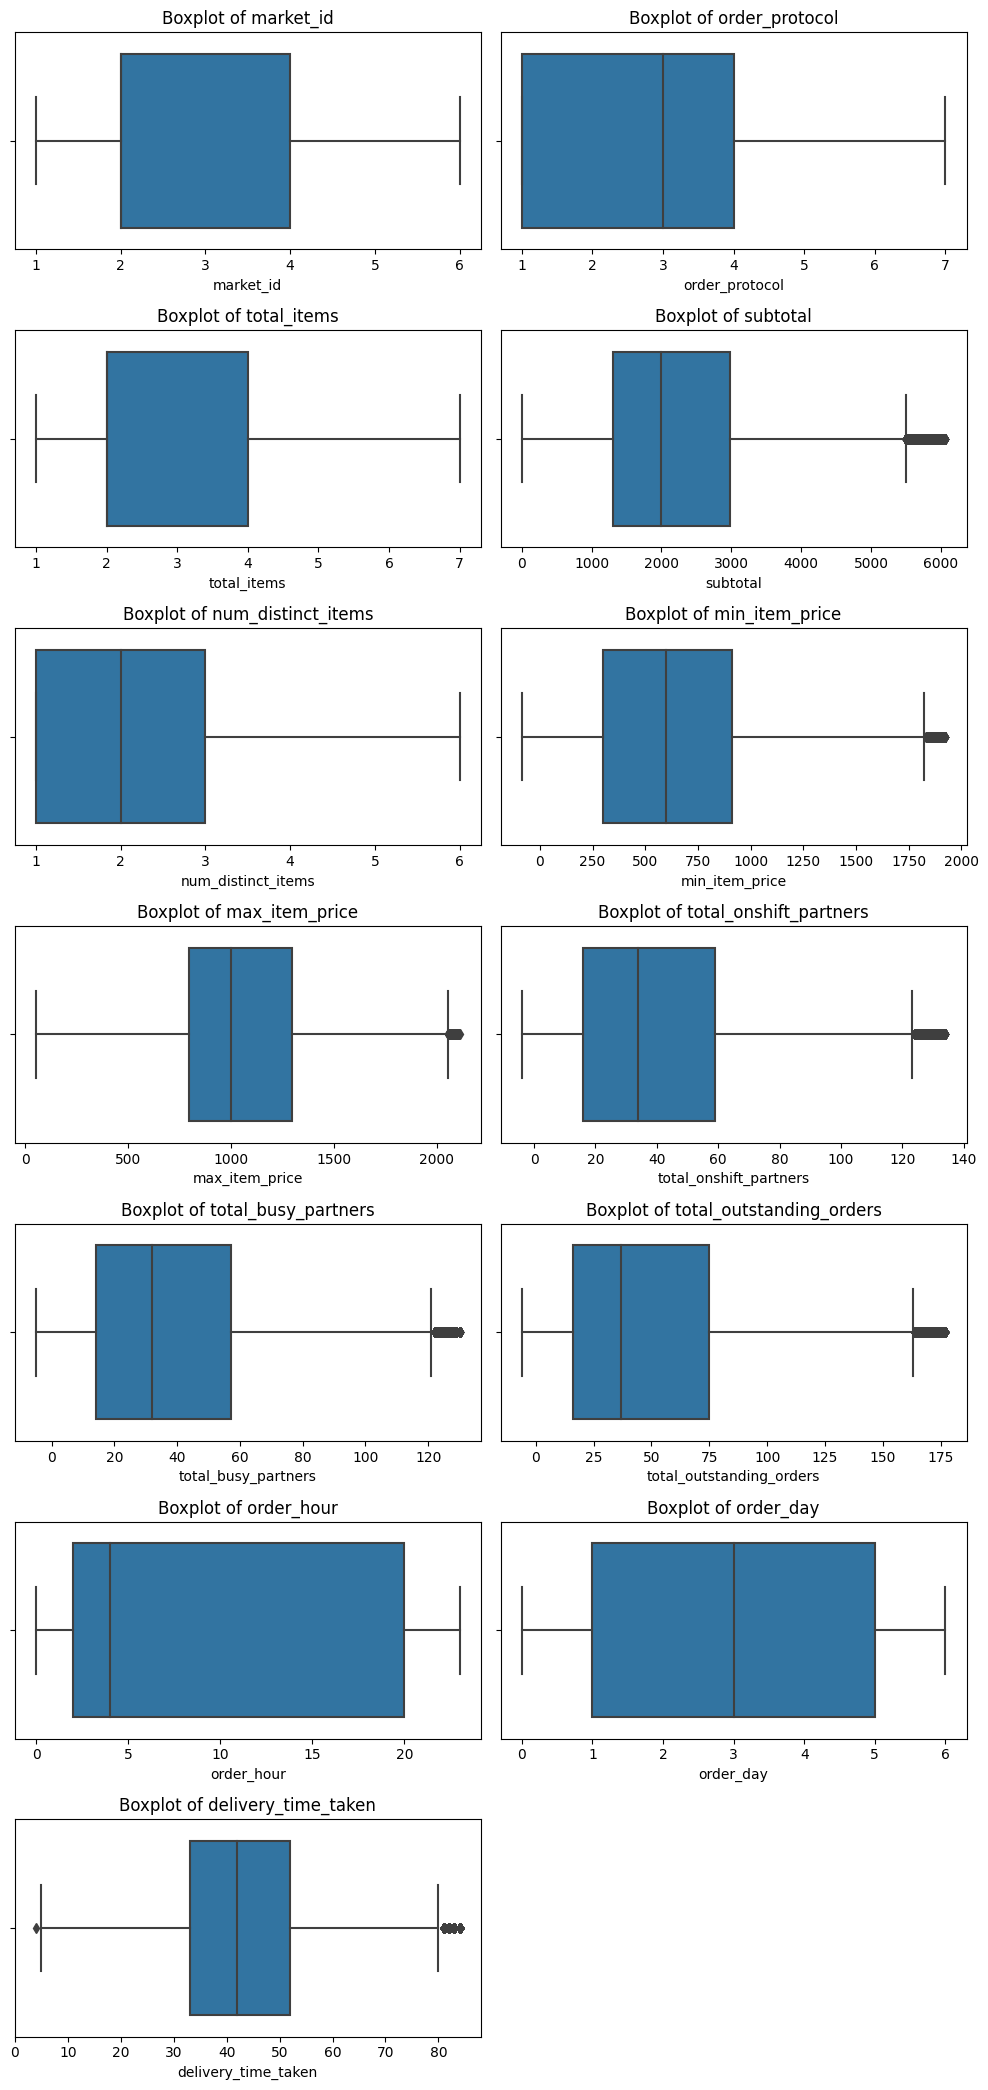

In [19]:
#Distribution of numerical variables
num_vars = df.select_dtypes('int').columns.tolist()
fig = plt.figure(figsize=(10,21))
i=1
for col in num_vars:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

## Non-Graphical Analysis

In [20]:
# Replace min & max item price with average price
df['avg_item_price'] = (df['min_item_price']+df['max_item_price'])/2
df.drop(columns=['min_item_price','max_item_price'], inplace=True)

In [21]:
# Number of unique values in all columns
unique_num = df.columns.tolist()
for col in unique_num:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in market_id: 6
No. of unique values in store_primary_category: 72
No. of unique values in order_protocol: 7
No. of unique values in total_items: 7
No. of unique values in subtotal: 5195
No. of unique values in num_distinct_items: 6
No. of unique values in total_onshift_partners: 139
No. of unique values in total_busy_partners: 136
No. of unique values in total_outstanding_orders: 184
No. of unique values in order_hour: 18
No. of unique values in order_day: 7
No. of unique values in delivery_time_taken: 81
No. of unique values in avg_item_price: 3057


In [22]:
# unique value market_id column(listed in %)
market_id = df['market_id'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
market_id.columns = ['market_id', 'Count']
market_id

,market_id,Count
0,2,29.60
1,4,25.55
2,1,21.22
3,3,12.67
4,5,10.59
5,6,0.37


In [23]:
# unique value order_protocol column(listed in %)
order_protocol = df['order_protocol'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
order_protocol.columns = ['order_protocol', 'Count']
order_protocol

,order_protocol,Count
0,1,27.68
1,3,26.46
2,5,23.89
3,2,11.98
4,4,9.60
5,6,0.38
6,7,0.01


In [24]:
# unique value total_items column(listed in %)
total_items = df['total_items'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
total_items.columns = ['total_items', 'Count']
total_items

,total_items,Count
0,2,30.60
1,3,21.74
2,1,21.40
3,4,13.63
4,5,7.02
5,6,3.96
6,7,1.65


In [25]:
# unique value num_distinct_items column(listed in %)
num_distinct_items = df['num_distinct_items'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
num_distinct_items.columns = ['num_distinct_items', 'Count']
num_distinct_items

,num_distinct_items,Count
0,2,32.72
1,1,26.65
2,3,22.56
3,4,11.58
4,5,4.88
5,6,1.61


In [26]:
# unique value order_day column(listed in %)
order_day = df['order_day'].value_counts(normalize=True).map(lambda calc: round(100*calc,2)).reset_index()
order_day.columns = ['order_day', 'Count']
order_day

,order_day,Count
0,6,16.52
1,5,15.65
2,4,14.64
3,3,13.60
4,0,13.31
5,2,13.27
6,1,13.01


In [27]:
df.describe().loc[['min', 'max']]

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_time_taken,avg_item_price
min,1.0,0.0,1.0,1.0,0.0,1.0,-4.0,-5.0,-6.0,0.0,0.0,4.0,10.5
max,6.0,72.0,7.0,7.0,6065.0,6.0,134.0,130.0,177.0,23.0,6.0,84.0,2000.0


## Univariate Analysis

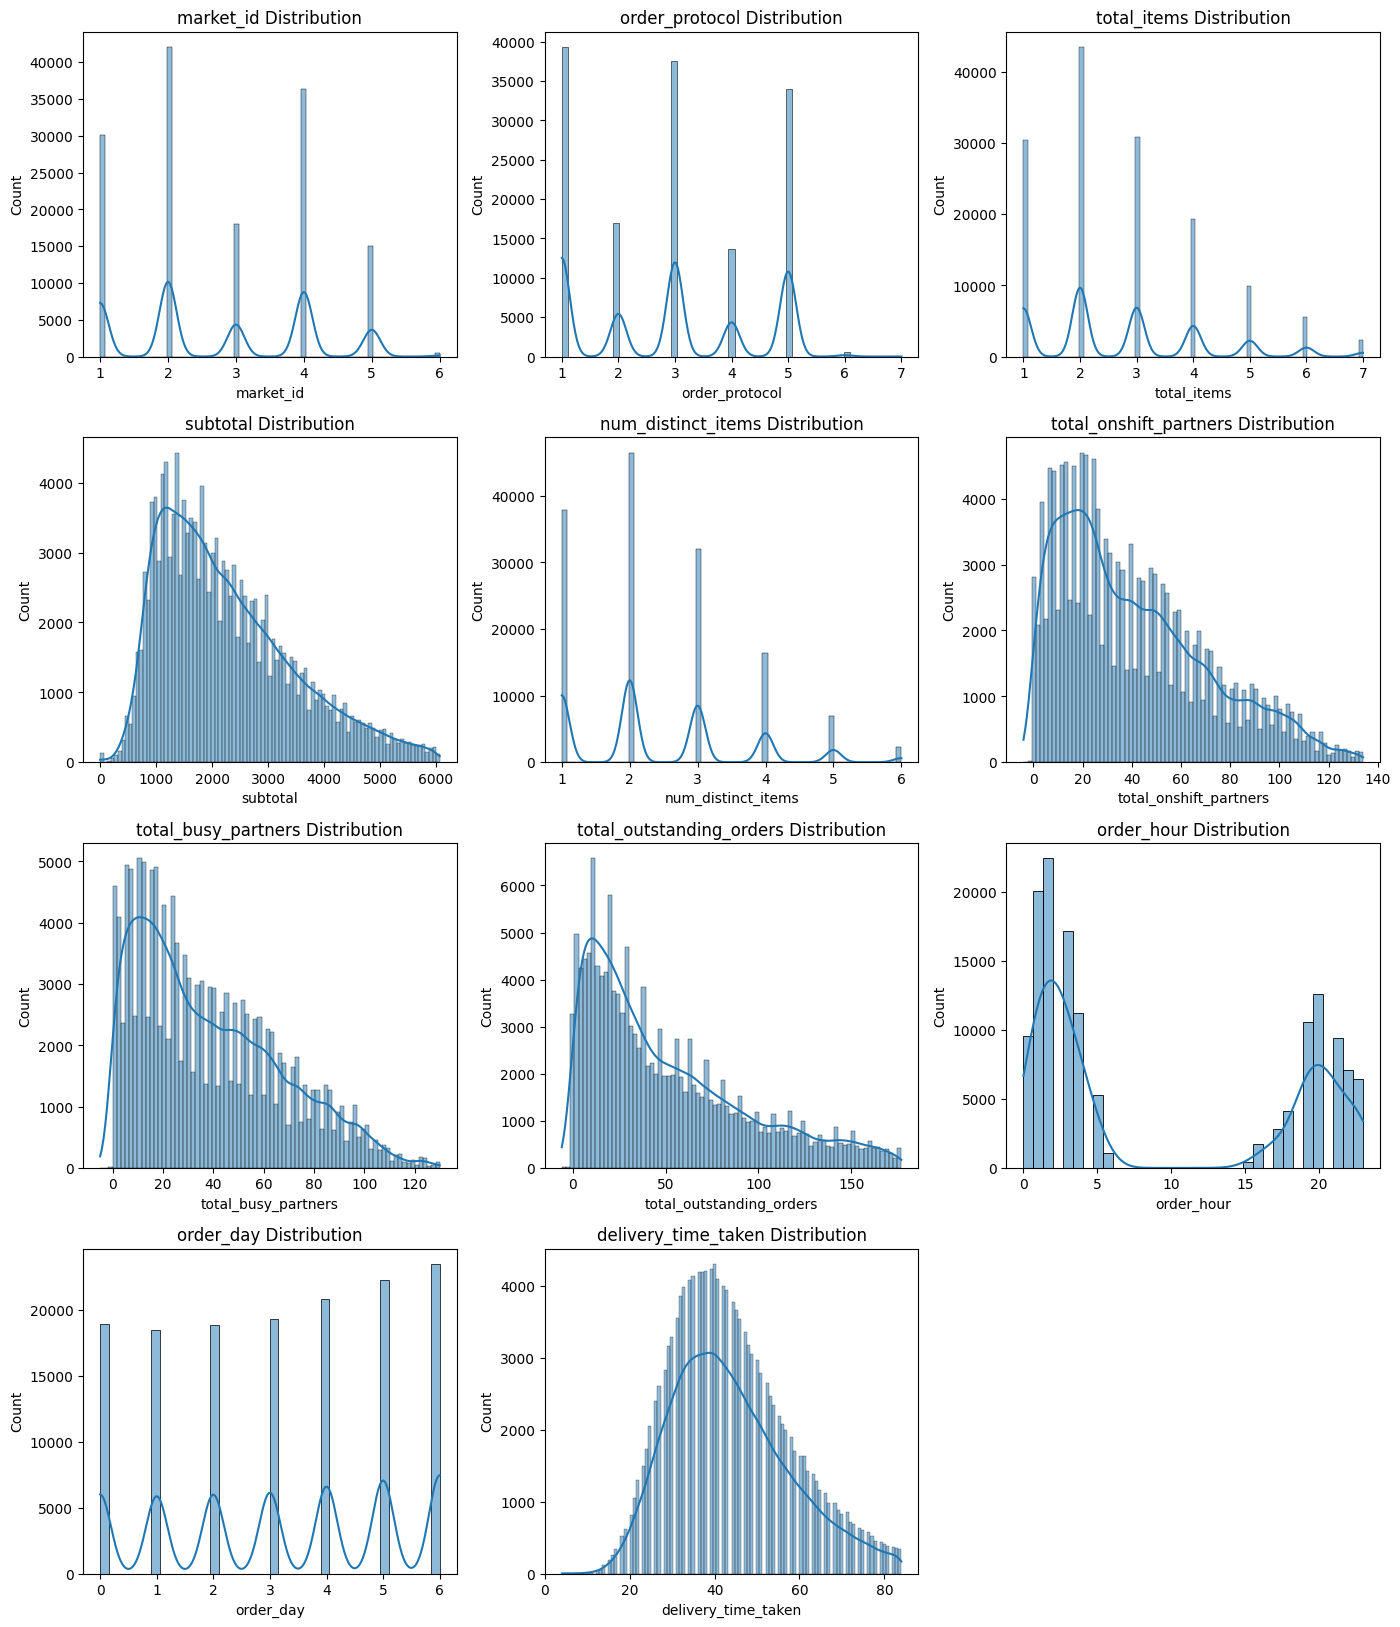

In [28]:
plot = df.select_dtypes('int').columns.tolist()

plt.figure(figsize=(14, 20))
i = 1
for col in plot:
    ax = plt.subplot(5, 3, i)  
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    i += 1

plt.tight_layout()
plt.show()

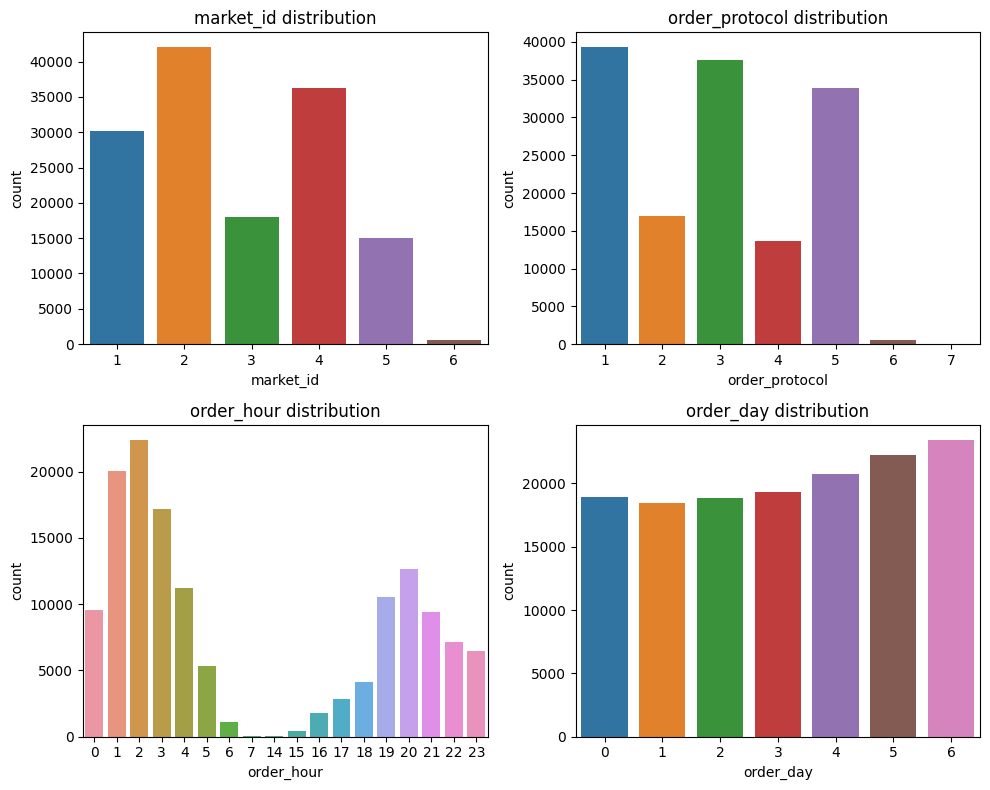

In [29]:
plot = ['market_id','order_protocol','order_hour','order_day']

plt.figure(figsize=(10,8))
i=1
for col in plot:
  ax=plt.subplot(2,2,i)
  sns.countplot(x=df[col])
  plt.title(f'{col} distribution')
  i += 1

plt.tight_layout()
plt.show()

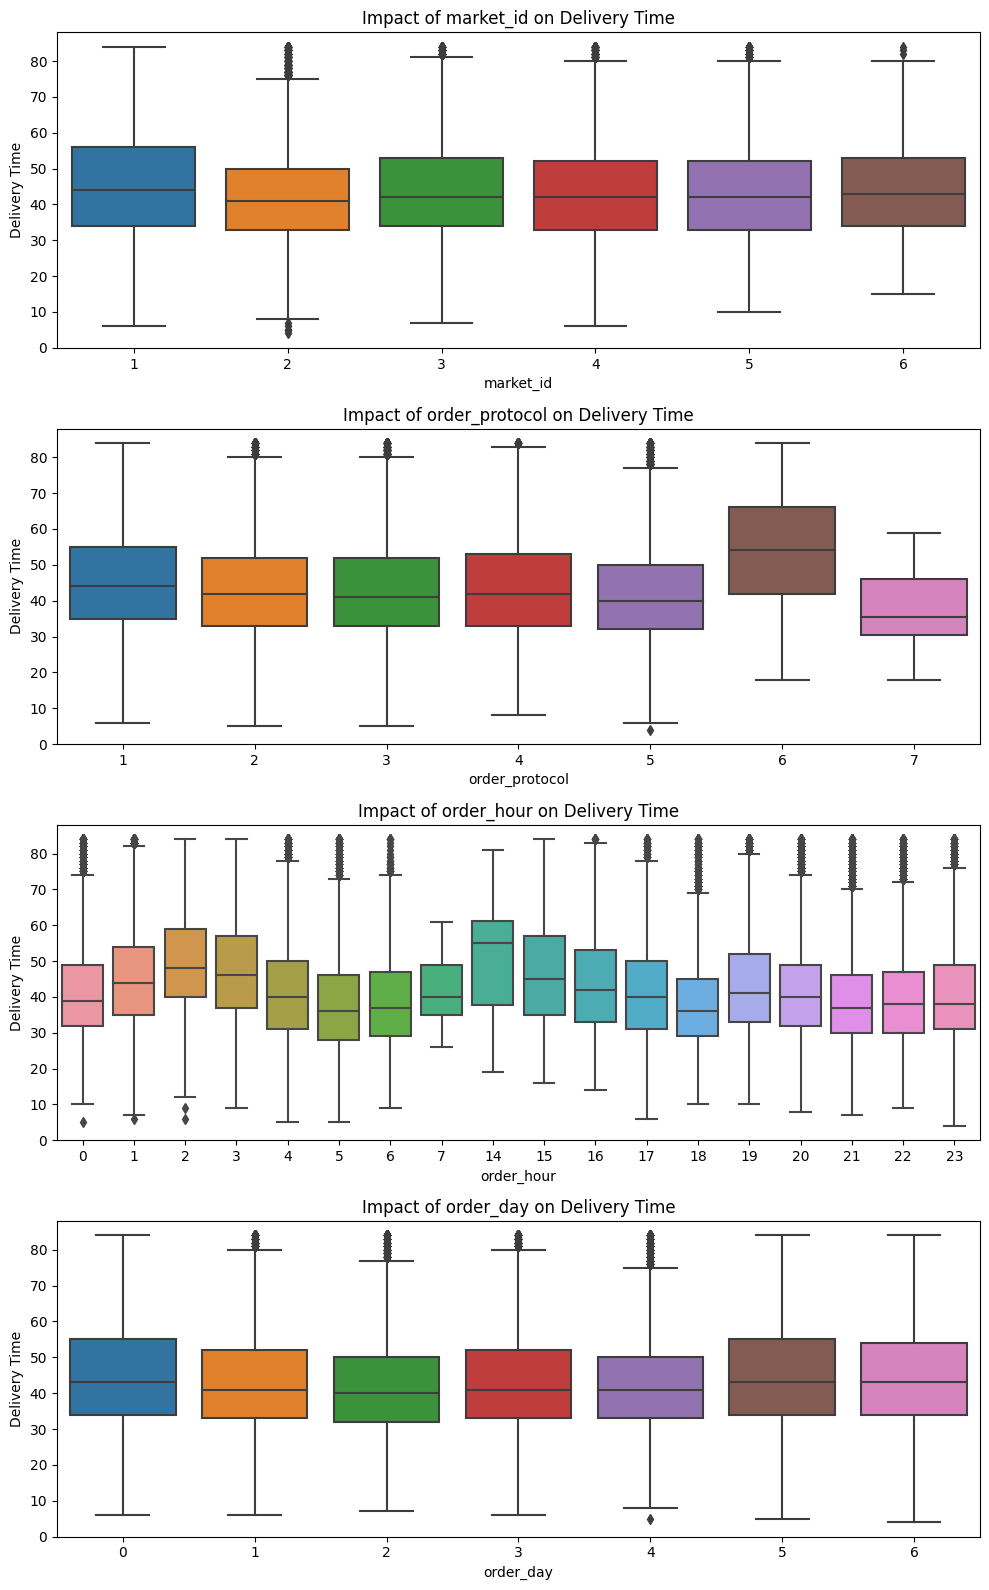

In [30]:
# Boxplots to analyse the relationship between categorical variables and delivery time

cat_cols = ['market_id','order_protocol','order_hour', 'order_day']

plt.figure(figsize=(10,16))
i=1
for col in cat_cols:
  ax = plt.subplot(4,1,i)
  sns.boxplot(data = df, x=col, y='delivery_time_taken')
  plt.title(f"Impact of {col} on Delivery Time")
  plt.xlabel(col)
  plt.ylabel('Delivery Time')
  i+=1

plt.tight_layout()
plt.show()

* Market ID shows no notable impact on delivery duration.
* Orders processed through protocol number 6 show relatively extended delivery times.
* Delivery times are significantly higher at 2 pm than at any other hour.
* Delivery times fluctuate more on Mondays, Saturdays, and Sundays, potentially due to increased order numbers.

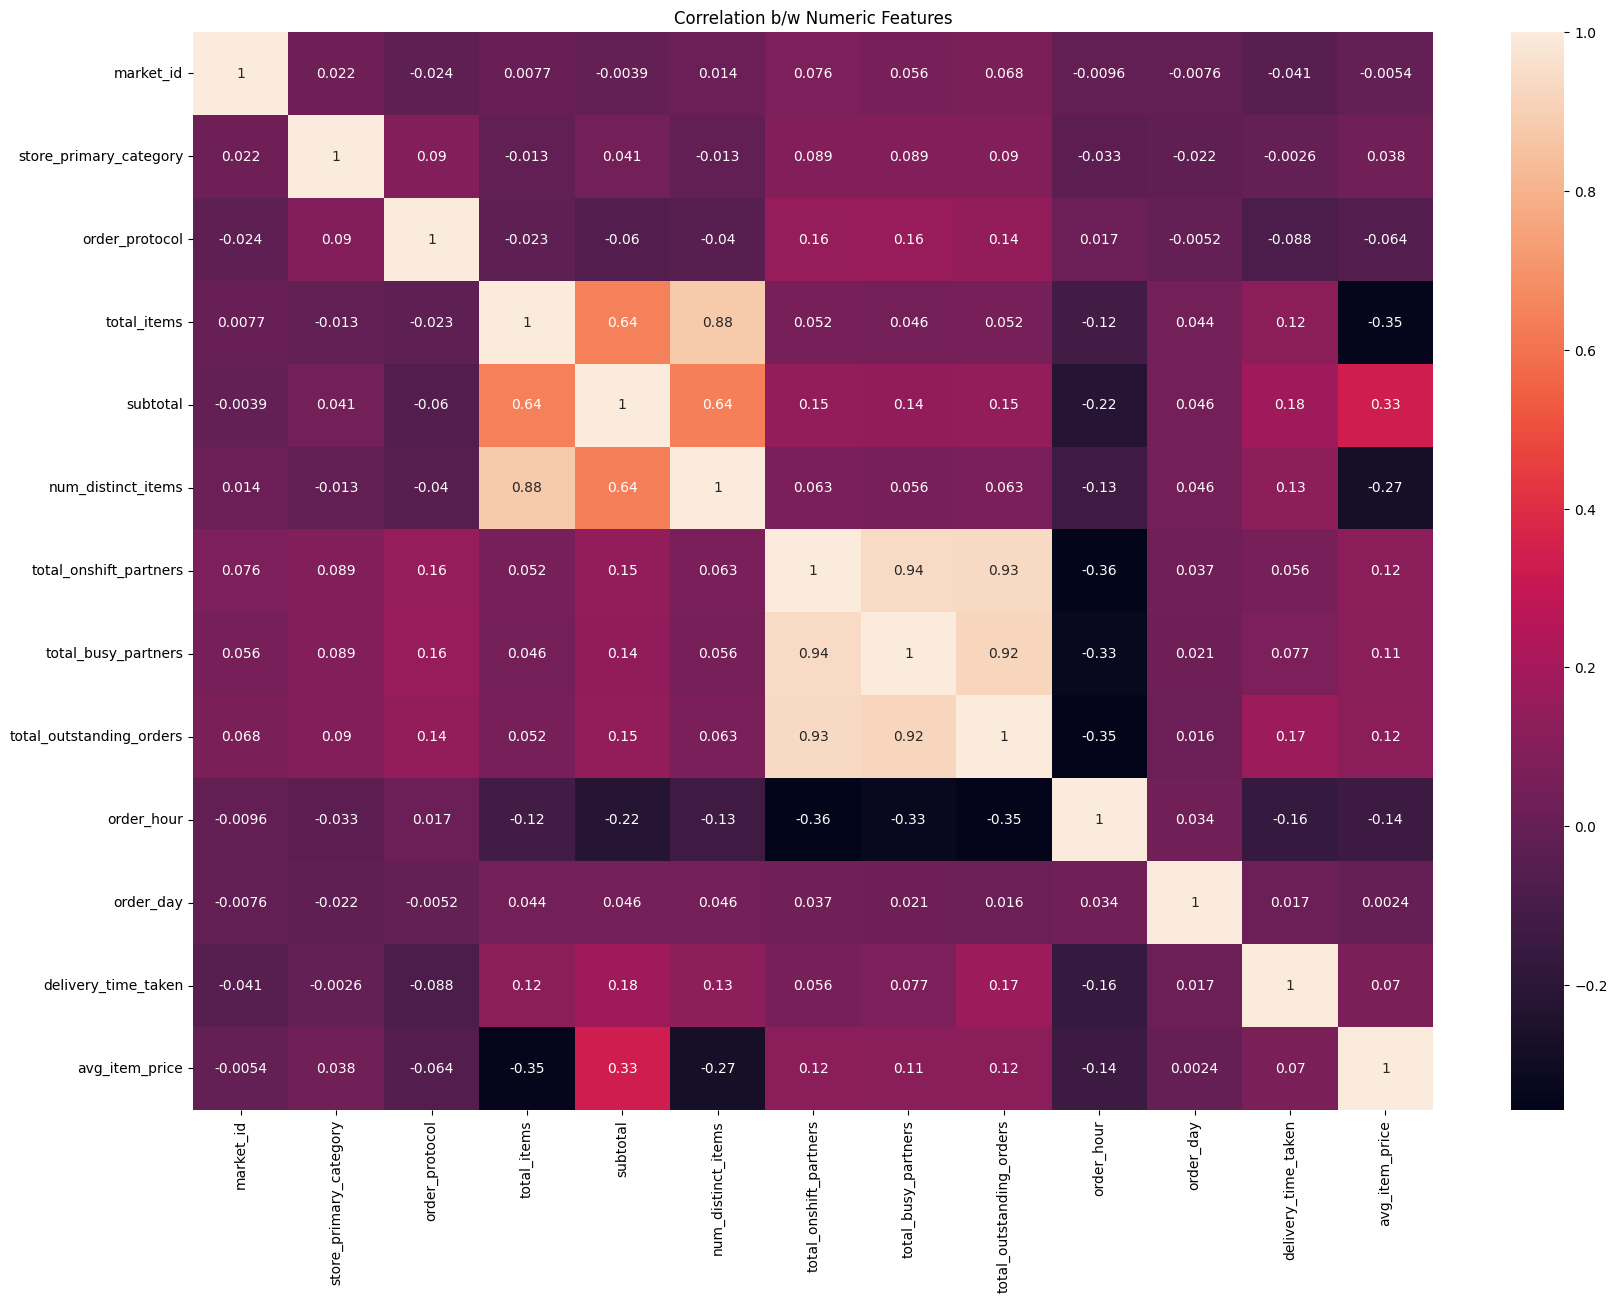

In [31]:
##Correlation Matrix
corr = df.corr()
plt.figure(figsize=(20,14))
sns.heatmap(corr, annot = True)
plt.title('Correlation b/w Numeric Features')
plt.show()

## Model Building

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [33]:
X = df.drop(columns=['delivery_time_taken'])
y = df['delivery_time_taken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of x_test: {X_test.shape}')

Shape of x_train: (113623, 12)
Shape of x_test: (28406, 12)


In [35]:
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of y_train: (113623,)
Shape of y_test: (28406,)


## Linear Regression

In [36]:
#Initialising object of Class LinearRegression()
lr_Test = LinearRegression()    # training LinearRegression model 
lr_Test.fit(X_train,y_train)

LinearRegression()

In [37]:
#r2 score on train data
r2_score(y_train,lr_Test.predict(X_train))

0.1674240826950587

In [38]:
#r2 score on test data
r2_score(y_test,lr_Test.predict(X_test))

0.16141248202773462

In [39]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [40]:
y_pred = lr_Test.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) #MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) #MAE
print("MAPE :",MAPE(y_test,y_pred) ) #MAPE
print("r2_score:",r2_score(y_test,y_pred)) #r2score

MSE: 166.17941324668996
RMSE: 12.89105943073299
MAE : 10.254421327002385
MAPE : 26.342697198065252
r2_score: 0.16141248202773462


## Random Forest Regressor

In [41]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
y_pred = regressor.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) #MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) #MAE
print("MAPE :",MAPE(y_test,y_pred) ) #MAPE
print("r2_score:",r2_score(y_test,y_pred)) #r2score

MSE: 154.1705630354631
RMSE: 12.416543924758736
MAE : 9.849843166936564
MAPE : 25.2465187704979
r2_score: 0.22201247871555574


## Feature Importance

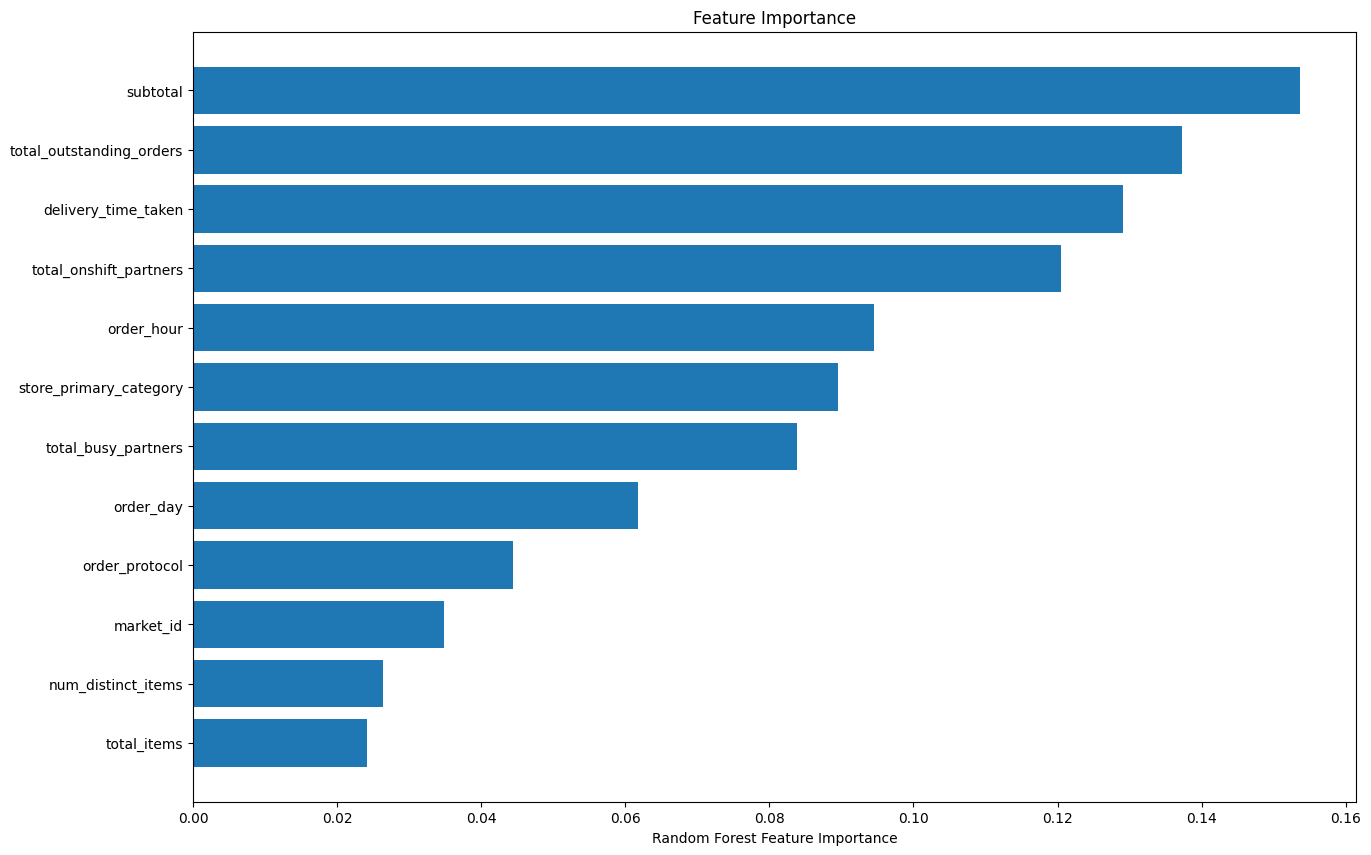

In [43]:
sorted_idx = regressor.feature_importances_.argsort()
plt.figure(figsize=(15,10))
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.title('Feature Importance')
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [44]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [45]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,697 (647.25 KB)

 Trainable params: 165,697 (647.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("CNN_best.keras", save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

# Train the model with callbacks
history = model.fit(X_train, y_train, 
                    epochs=50, verbose=1, 
                    batch_size=64, validation_split=0.2, 
                    callbacks=[early_stop, checkpoint])

Epoch 1/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 309.3676 - mae: 13.2066 - val_loss: 164.8390 - val_mae: 10.1866
Epoch 2/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 170.8811 - mae: 10.3742 - val_loss: 163.9697 - val_mae: 10.2849
Epoch 3/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 169.9551 - mae: 10.3621 - val_loss: 161.5222 - val_mae: 10.1004
Epoch 4/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 169.4972 - mae: 10.3421 - val_loss: 160.8855 - val_mae: 10.0460
Epoch 5/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 166.3934 - mae: 10.2174 - val_loss: 165.4484 - val_mae: 9.9875
Epoch 6/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 167.0592 - mae: 10.2488 - val_loss: 160.1856 - val_mae: 10.1329
Epoch 7/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 165.5129 - mae: 10.2045 - val_loss: 167.8309 - val_mae: 10.5551
Epoch 8/50
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 165.2750 - mae: 10.1992 - val_loss: 158.2682 

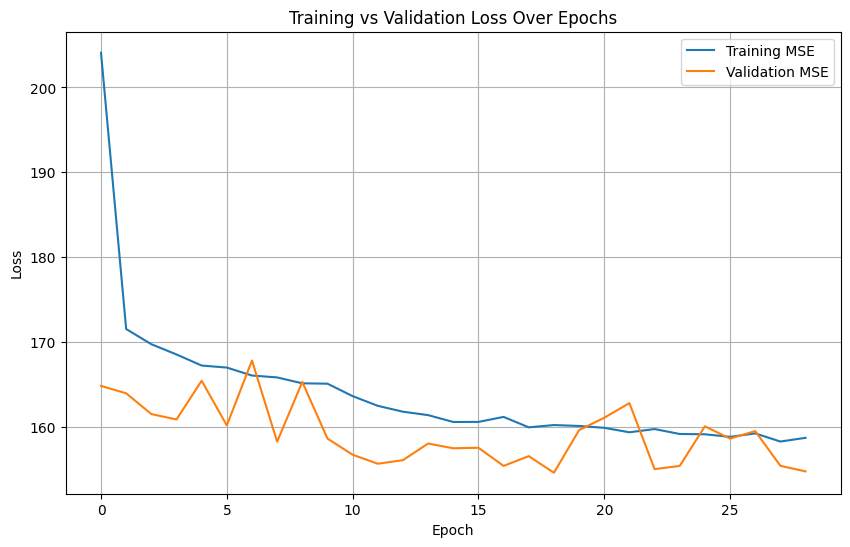

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.history['loss'], label='Training MSE')
ax.plot(history.history['val_loss'], label='Validation MSE')

ax.set_title('Training vs Validation Loss Over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.legend(loc='best')
plt.grid(True)
plt.show()

In [50]:
y_pred = model.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_pred)) #MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) #MAE
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred) ) #MAPE
print("r2_score:",r2_score(y_test,y_pred)) #r2score

888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
MSE: 155.6469484899873
RMSE: 12.475854619623751
MAE : 9.926205313844445
MAPE : 0.25493256842432643
r2_score: 0.22020153682583432


## Conclusion:
* The Logistic Regression model required considerably more time for training compared to the  Neural Network model and Random Forest Regressor.
* Prediction time was also longer with the Neural Network model.
* Generally, neural networks are known to deliver higher accuracy than random forest regressors across various problem types, as they are capable of learning more intricate relationships between input features and target variables.

### Questions

**1. Defining the problem statements and where can this and modifications of this be used?**
* Porter, India's largest marketplace for intra-city logistics, partners with restaurants to handle food deliveries.
* The company aims to provide its customers with accurate delivery time estimates based on several influencing factors.
* Key factors include order time, items ordered, delivery partner availability, the number of outstanding orders, and the type of restaurant.
* The objective is to develop a regression model that can predict delivery times with high accuracy using these features.
***
**2. List 3 functions the pandas datetime provides with one line explanation.**  

* **pd.to_datetime():** Converts input data to datetime format.
* **pd.date_range():** Creates a sequence of dates between specified start and end.
* **pd.to_timedelta:** Converts input to a timedelta, representing durations.
***
**3. Short note on datetime, timedelta, time span (period)**
* **datetime:** Represents a specific point in time, including date and time components. It is used for precise timekeeping and manipulating time-related data.

* **timedelta:** Represents a duration or difference between two dates or times. It is used for arithmetic operations involving dates and times, such as adding or subtracting durations.

* **time Span (Period):** Defines a range or interval of time. It can be represented by a pair of datetime objects (start and end) or by a datetime object combined with a timedelta to specify the extent of the period.
***
**4. Why do we need to check for outliers in our data?**
* Outliers are data points that deviate significantly from the majority of the dataset. They can arise from various sources, such as data entry errors, and may distort statistical analyses, making it challenging to draw precise conclusions.

* Here’s why identifying outliers is crucial:

    1. Impact on Statistical Analysis: Outliers can disproportionately affect statistical measures like the mean, median, and standard deviation. They may skew these values, leading to misleading results and inaccurate interpretations.

    2. Challenges in Drawing Conclusions: Outliers can obscure the true distribution of data and mask underlying patterns. This distortion makes it harder to derive meaningful insights and understand the data accurately.

    3. Errors in Data Entry: Outliers might be introduced due to mistakes in data recording. For instance, an incorrectly entered value can create an outlier, so it’s essential to detect and address these anomalies before performing data analysis.
***
**5. Name 3 outlier removal methods?**
* Here are three common methods for removing outliers:

    1. **Z-Score Method:** Identifies outliers by calculating the Z-score, which measures how many standard deviations a data point is from the mean. Data points with a Z-score beyond a certain threshold are considered outliers.

    2. **IQR Method:** Uses the Interquartile Range (IQR), which is the range between the first (25th percentile) and third quartile (75th percentile). Data points that fall below Q1 − 1.5 × IQR or above Q3 + 1.5 × IQR are flagged as outliers.

    3. **Isolation Forest:** A machine learning-based method that isolates observations by randomly selecting features and splitting values. Outliers are identified as observations that are isolated earlier in the process compared to normal data points.
***
**6. What classical machine learning methods can we use for this problem?**
* For outlier detection, classical machine learning methods include:

    1. **K-Nearest Neighbors (KNN):** Uses distance metrics to find the k-nearest neighbors of a data point. Outliers are identified as points that have a larger average distance to their neighbors compared to the majority of points.

    2. **One-Class SVM (Support Vector Machine):** Trains a model to separate the data from the origin in a high-dimensional space. Data points that fall outside the learned boundary are considered outliers.

    3. **Isolation Forest:** Specifically designed for anomaly detection, it isolates observations by randomly selecting features and splitting values. Points that are isolated quickly are likely outliers.

    4. **Local Outlier Factor (LOF):** Measures the local density deviation of a data point compared to its neighbors. Points with significantly lower density compared to their neighbors are flagged as outliers.

    5. **Robust PCA (Principal Component Analysis):** Decomposes the data into a low-rank matrix and a sparse matrix. Outliers are captured in the sparse matrix, making it possible to detect anomalous data points.
***
**7. Why is scaling required for neural networks?**
* Scaling is crucial for neural networks due to several reasons:

    1. **Improves Convergence:** Scaling features to a similar range (e.g., [0, 1] or standardizing to zero mean and unit variance) helps the neural network converge faster during training. It ensures that gradients are more stable and prevents some features from disproportionately influencing the weight updates.

    2. **Reduces Numerical Instability:** Neural networks often involve operations that can lead to numerical instability, such as large matrix multiplications and activation functions. Scaling inputs helps mitigate issues related to overflow or underflow, ensuring more stable computations.

    3. **Facilitates Activation Function Efficiency:** Many activation functions (like sigmoid and tanh) are sensitive to the scale of the inputs. Scaling ensures that inputs to these functions lie within the region where they can effectively learn and provide meaningful gradients.

    4. **Balances Feature Importance:** Different features might have different scales (e.g., height in cm vs. weight in kg). Scaling ensures that each feature contributes equally to the model's learning process, preventing features with larger scales from dominating the learning process.

    5. **Improves Training Speed:** When features are on a similar scale, the optimization process (e.g., gradient descent) can proceed more smoothly and efficiently, potentially reducing the number of epochs required to train the model.
***
**8. Briefly explain your choice of optimizer.**   
* **Combines Momentum and RMSProp:** Adam integrates the benefits of both Momentum (which uses moving averages of past gradients) and RMSProp (which uses moving averages of squared gradients).
* **Adaptive Learning Rates:** It automatically adjusts learning rates for each parameter, allowing for efficient and reliable convergence.
* **Faster Convergence:** The combination of momentum and adaptive learning rates often leads to faster and more stable convergence compared to traditional optimizers.
* **Robust Performance:** Adam performs well across a wide range of problems and is less sensitive to hyperparameter tuning.
* **Efficient:** It is computationally efficient and has low memory requirements, making it suitable for large-scale machine learning problems.
***
**9. Which activation function did you use and why?**
1. **ReLU: A Popular Activation Function**
    * ReLU, widely used in neural networks and deep learning, addresses the vanishing gradient problem seen in functions like sigmoid and tanh. By introducing sparsity, ReLU deactivates neurons with negative inputs, improving network efficiency.

2. **Advantages of ReLU in Neural Networks**
    * ReLU is a favored activation function in deep learning for its ability to tackle the vanishing gradient problem. It introduces sparsity by deactivating neurons with negative inputs, enhancing the performance of neural networks.

3. **ReLU's Benefits in Deep Learning**
    * ReLU is commonly used in neural networks because it helps reduce the vanishing gradient problem, unlike sigmoid and tanh. It also creates sparse activation by turning off neurons with negative outputs, making the model more efficient. 
***
**10. Why does a neural network perform well on a large dataset?**  
* A neural network performs well on a large dataset because larger datasets provide more diverse and comprehensive information for the model to learn from, leading to better generalization. Here are the key reasons:

    1. Better Learning of Patterns: Large datasets capture a wider range of patterns, relationships, and nuances in the data, allowing the neural network to learn complex features effectively.

    2. Reduced Overfitting: With more data, the model is less likely to memorize specific samples, reducing the risk of overfitting. This leads to a model that performs better on unseen data.

    3. Improved Generalization: Large datasets provide the network with a broader understanding of the underlying distribution of the data, enhancing its ability to make accurate predictions on new inputs.

    4. Balanced Classes: Larger datasets are more likely to provide balanced class distributions, which helps the model learn equally well across different classes, improving overall performance.

    5. Enhanced Training Stability: With more examples, the gradient estimates during training are more accurate, leading to smoother and more stable convergence.

* Overall, a large dataset equips neural networks with the information needed to learn complex decision boundaries and improve their predictive capabilities.